### Problem 1
Use MCMC with Gaussian proposal distribution to generate 10000 samples from the distribution:
$$p(x) = \alpha_1N(\mu_1, \sigma_1) + \alpha_2N(\mu_2, \sigma_2) + \alpha_3N(\mu_3, \sigma_3)$$
for selected $\alpha_i, \mu_i, \sigma_i$.

Compare to the regular sampling from the Gaussian Mixture Model.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [5]:
def gen_GMM(means, scales, mixture):
    idx = np.random.choice(np.arange(means.size), 1, p=mixture)
    return np.random.normal(means[idx], scales[idx], 1)

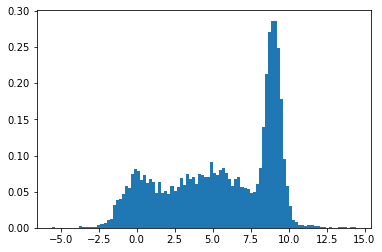

In [6]:
N = 10000
means = np.array([0, 5, 9])
scales = np.array([1, 2.5, 0.5])
mixture = np.array([1, 3, 2])/6

x = np.array([gen_GMM(means, scales, mixture) for i in range(N)])

plt.hist(x, bins=100, density=True)
plt.show()

In [7]:
def GMM_pdf(x, means, scales, mixture):
    p = 0
    for i in range(means.size):
        p += mixture[i] * stats.norm.pdf(x, means[i], scales[i])
    return p

def MCMC_GMM(means, scales, mixture, n, sigma):
    result = []
    x = 0
    while len(result)<n:
        p = GMM_pdf(x, means, scales, mixture)
        x1 = x + np.random.normal(0, sigma)
        p1 = GMM_pdf(x1, means, scales, mixture)
        A = p1 / p
        if np.random.random() < A:
            x = x1
        result.append(x)
    return np.array(result)

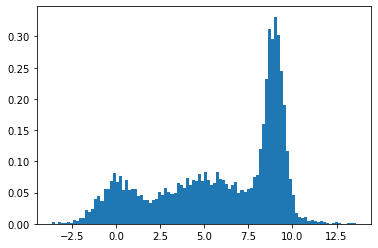

In [11]:
y = MCMC_GMM(means, scales, mixture, N, 1)
plt.hist(y, bins=100, density=True)
plt.show()

# y = MCMC_GMM(means, scales, mixture, N, 0.001)
# plt.hist(y, bins=100, density=True)
# plt.show()

# y = MCMC_GMM(means, scales, mixture, N, 0.1)
# plt.hist(y, bins=100, density=True)
# plt.show()

### Problem 2
Use MCMC with Gaussian proposal distribution to generate 10000 samples from the distribution:
$$p(x) \propto \frac{x}{x+1} + \sin^2 x e^{\sin x}$$
where $x\in [0, 2\pi]$.

In [14]:
def f(x):
    if x <0 or x > 2*np.pi:
        return 0
    else:
        return x/(x+1) + np.sin(x)**2 * np.exp(np.sin(x))

In [15]:
def MCMC_GMM(n, sigma):
    result = []
    x = np.pi
    while len(result)<n:
        p = f(x)
        x1 = x + np.random.normal(0, sigma)
        p1 = f(x1)
        A = p1 / p
        if np.random.random() < A:
            x = x1
        result.append(x)
    return np.array(result)

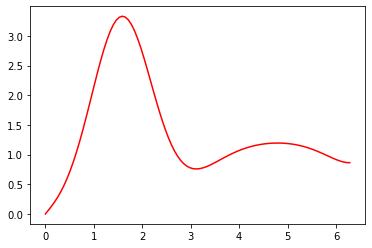

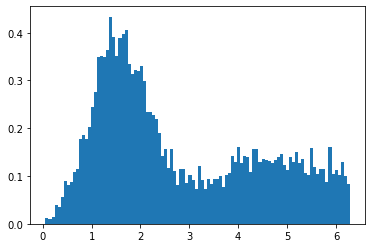

In [25]:
y = MCMC_GMM(N, 0.5)
x_base = np.linspace(0, 2*np.pi, 100)
plt.plot(x_base, np.array([f(x_base[i]) for i in range(x_base.size)]), 'r-')
plt.show()
plt.hist(y, bins=100, density=True)
plt.show()

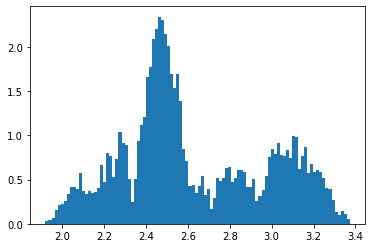

In [18]:
y = MCMC_GMM(N, 0.01)
plt.hist(y, bins=100, density=True)
plt.show()

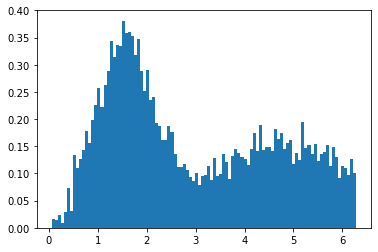

In [19]:
y = MCMC_GMM(N, 0.5)
plt.hist(y, bins=100, density=True)
plt.show()

### Problem 3
Use Gibbs Sampling to sample uniformly from a set of binary $5 \times 5$ non-degenerate matrices.

Use `numpy.linalg.det`.

### Problem 4

Select parameters for two non-collinear lines
$$y = a^{(i)}x + b^{(i)}$$
Generate 25 points on each line in the range $x \in [-10; 10]$, add random gaussian noise with zero mean and std $\sigma = 0.5$ to 50% of all the points. Add 10 random points not from the lines. Plot to verify that task looks reasonable. Combine all generated points into one array and treat it as an input data.

Use RANSAC to find best fit:
1. Select 2 pairs of random points
2. "Draw" two lines through these two pairs (find parameters)
3. Calculate avg MSE by assigning each point to the closest (vertical distance) line
4. Repeat N (sufficiently large) times and keep the best fit

Plot final solution and original lines for comparison.